# Email Spam Classifier

## Importing librearies

In [2]:
import pandas as pd
from nltk.corpus import stopwords 
import numpy as np
import seaborn as sns
import string

In [3]:
df = pd.read_csv('spam.csv',encoding='ISO-8859-1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [6]:
unwanted = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']

df.drop(unwanted,axis =1,inplace=True)

df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.rename(columns={'v1':'spam','v2':'text'},inplace=True)

In [8]:
df.head()

,spam,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Count of the dataset

C:\JupyterLab\resources\jlab_server\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='spam', ylabel='count'>

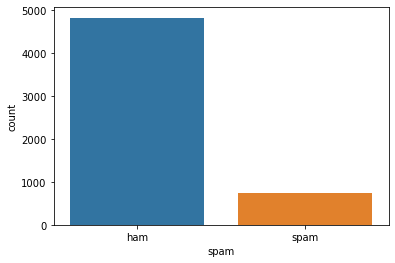

In [9]:
sns.countplot(df['spam'])

## Data Cleaning

In [10]:
df['text'].head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: text, dtype: object

In [11]:
for i in range(len(df['text'])):
    if i < 5:
        print(df['text'][i])

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Ok lar... Joking wif u oni...
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
U dun say so early hor... U c already then say...
Nah I don't think he goes to usf, he lives around here though


In [12]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\murth/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\murth/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Removing 

In [14]:
df.shape

(5572, 2)

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.shape

(5169, 2)

In [17]:
import nltk
from nltk.stem.porter import PorterStemmer

pr = PorterStemmer()

# clean_words = []

def process_words(text):    #print('********** Text *************')
    # Normal Text
    #print(df['text'][i])
    #print('********** Step 1 *************')
    # Removing Punctuation
    nopun = [chir for chir in text if chir not in string.punctuation]
    #print(nopun)
    #print('********** Step 2 *************')
    # Joining the char into words again
    nopun = ''.join(nopun)
    #print(nopun)
    #print('********** Step 3 *************')
    # tokenize the word
    token = nltk.word_tokenize(nopun)
    #print(token)
    #print('********** Step 4 *************')
    # find the root word 
    with_stem_words = [pr.stem(word) for word in nopun.split() if word.lower() not in stopwords.words('english')]
    # with_stem_words = ' '.join(with_stem_words)
    #print(clean_words)
    # clean_words.append(with_stem_words)
    return with_stem_words
    

In [18]:
df['text'].head().apply(process_words)

0    [go, jurong, point, crazi, avail, bugi, n, gre...
1                         [ok, lar, joke, wif, u, oni]
2    [free, entri, 2, wkli, comp, win, fa, cup, fin...
3        [u, dun, say, earli, hor, u, c, alreadi, say]
4    [nah, dont, think, goe, usf, live, around, tho...
Name: text, dtype: object

## Vectorize the text

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(lowercase=False)

X = cv.fit_transform(df['text']).toarray()


In [21]:
X.shape

(5169, 10800)

In [22]:
df.shape

(5169, 2)

In [25]:
y = pd.get_dummies(df['spam'],drop_first=True)

In [26]:
y.shape

(5169, 1)

In [27]:
y.head()

,spam
0,0
1,0
2,1
3,0
4,0


In [28]:
df['spam'].head()

0     ham
1     ham
2    spam
3     ham
4     ham
Name: spam, dtype: object

## Train Test Split

In [29]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

X_train.shape


(4135, 10800)

In [31]:
y_train.shape

(4135, 1)

## Model Selection

In [34]:
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB().fit(X_train,y_train)


C:\JupyterLab\resources\jlab_server\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [60]:
from sklearn.metrics import confusion_matrix,classification_report,precision_score,accuracy_score

pred = classifier.predict(X_test)

print(classification_report(y_test,pred))


              precision    recall  f1-score   support

           0       0.99      0.98      0.98       889
           1       0.87      0.93      0.90       145

    accuracy                           0.97      1034
   macro avg       0.93      0.95      0.94      1034
weighted avg       0.97      0.97      0.97      1034



In [61]:
print(pred)

[0 0 0 ... 1 0 0]


In [62]:
cf_matrix =confusion_matrix(y_test,pred)

In [63]:
print(cf_matrix)

[[869  20]
 [ 10 135]]


<AxesSubplot:>

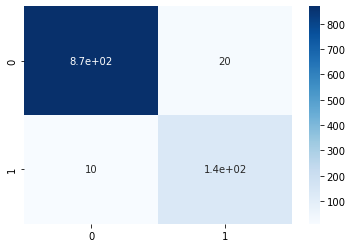

In [64]:
sns.heatmap(cf_matrix,cmap='Blues',annot=True)

In [65]:
print(accuracy_score(y_test,pred))

0.9709864603481625
